

# Project: Investigate a Dataset (No-show appointments in Brazil!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### No-show appointments in Brazil!

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.  
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.  
● ‘Neighborhood’ indicates the location of the hospital.  
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 
#### Note : Yes = No-show      
 -----
  
  



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
## read Csv file
df_1 = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
## Get random samole of dataset
df_1.sample(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
73250,9.941963e+13,5656765,M,2016-05-04T08:29:48Z,2016-05-13T00:00:00Z,4,ROMÃO,0,0,0,0,0,0,Yes
24790,7.582692e+13,5692465,F,2016-05-12T15:25:20Z,2016-05-19T00:00:00Z,57,SANTO ANDRÉ,1,0,1,0,0,0,Yes
86305,9.661257e+14,5784575,F,2016-06-07T16:21:25Z,2016-06-07T00:00:00Z,44,FORTE SÃO JOÃO,0,0,0,0,0,0,No
78647,6.865846e+10,5694272,M,2016-05-13T08:25:20Z,2016-05-13T00:00:00Z,9,BONFIM,0,0,0,0,0,0,No
42826,2.598974e+14,5729868,F,2016-05-24T07:55:30Z,2016-05-24T00:00:00Z,8,TABUAZEIRO,0,0,0,0,0,0,No
9676,4.821116e+12,5644715,M,2016-05-02T09:01:46Z,2016-05-06T00:00:00Z,7,CRUZAMENTO,0,0,0,0,0,0,No
87075,1.562373e+12,5538268,F,2016-04-01T11:38:32Z,2016-06-06T00:00:00Z,48,JARDIM CAMBURI,0,0,0,0,0,1,No
18295,2.677355e+12,5678375,M,2016-05-10T08:26:09Z,2016-05-10T00:00:00Z,59,SANTA MARTHA,1,0,0,0,0,0,No
82817,3.157742e+11,5719789,F,2016-05-19T12:06:25Z,2016-05-30T00:00:00Z,19,BONFIM,0,0,0,0,0,0,Yes
54006,4.933652e+11,5663057,M,2016-05-05T09:26:21Z,2016-05-05T00:00:00Z,50,ILHA DE SANTA MARIA,0,0,0,0,0,0,No


In [4]:
df_1.shape

(110527, 14)

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
## Get all the describtion for dataset columns
df_1.describe(include = 'all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [7]:
## search for the unique values in AppointmentDay
df_1['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

In [8]:
## search for the unique values in Neighbourhood
df_1['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [9]:
## Get the row in which Age column value is -1
df_1.loc[df_1['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:

df_1.loc[df_1['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
## Get the rows in which Handcap column values is greater than 1
df_1.loc[df_1['Handcap'] > 1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


### Data Cleaning 

### Assess of Data
####  After Visual and programmatic assessment .

#### Quality
* change (Hipertension , Handcap , No-show)  to (Hypertension , handicapped , No_show).
* Age of -1 is inaccurate .
* Handicap data over 1 is inaccurate .
* Change (PatientId) Column type to int64.
* Change (Gender ,Neighbourhood ) Columns type to Category.
* Change (ScheduledDay ,AppointmentDay) Columns type to datetime.  
* Change (Scholarship ,Hypertension ,Diabetes ,Alcoholism ,handicapped ,SMS_received ,No-show) Columns type to bool.

### Cleaning of Data

In [12]:
## Copy the dataset
df1_clean = df_1.copy()

#### Define
* change (Hipertension , Handcap , No-show)  to (Hypertension , handicapped , No_show).

#### Code

In [13]:
## change the name of Hipertension , Handcap , No-show 
df1_clean.rename({'Hipertension': 'Hypertension', 
                  'Handcap': 'handicapped' , 
                  'No-show': 'No_show'}, axis=1, inplace=True)

#### Test

In [14]:

df1_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,handicapped,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Define
* Age of -1 is inaccurate .

#### Code

In [15]:
## drop the row contain age -1
df1_clean = df1_clean.loc[df1_clean['Age'] >= 0]

#### Test

In [16]:
df1_clean.loc[df1_clean['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,handicapped,SMS_received,No_show


#### Define
* Handicap data over 1 is inaccurate .

#### Code

In [17]:
## replace any value above 1 with 1

df1_clean['handicapped'].replace([2, 3 , 4], [1, 1,1], inplace=True)

#### Test

In [18]:
df1_clean['handicapped'].describe()

count    110526.000000
mean          0.020276
std           0.140943
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: handicapped, dtype: float64

#### Define
* Change (PatientId) Column type to int64.
* Change (Gender ,Neighbourhood ) Columns type to Category.
* Change (ScheduledDay ,AppointmentDay) Columns type to datetime.  
* Change (Scholarship ,Hypertension ,Diabetes ,Alcoholism ,handicapped ,SMS_received ) Columns type to bool.

#### Code

In [19]:
## Change the type of columns
convert_dict = {'PatientId': 'int64',
                'Gender': 'category',
                'Neighbourhood': 'category',
                'ScheduledDay': 'datetime64',
                'AppointmentDay': 'datetime64',
                'Scholarship': bool,
                'Hypertension': bool,
                'Diabetes': bool,
                'Alcoholism': bool,
                'handicapped': bool,
                'SMS_received': bool,
            
               }
  
df1_clean = df1_clean.astype(convert_dict)

#### Test

In [20]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110526 non-null  int64         
 1   AppointmentID   110526 non-null  int64         
 2   Gender          110526 non-null  category      
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   Age             110526 non-null  int64         
 6   Neighbourhood   110526 non-null  category      
 7   Scholarship     110526 non-null  bool          
 8   Hypertension    110526 non-null  bool          
 9   Diabetes        110526 non-null  bool          
 10  Alcoholism      110526 non-null  bool          
 11  handicapped     110526 non-null  bool          
 12  SMS_received    110526 non-null  bool          
 13  No_show         110526 non-null  object        
dtypes: bool(6), category(2), datetime64[

<a id='eda'></a>
## Exploratory Data Analysis

### Show (No) Vs. No-Show(yes) in appointments in Brazil!
### We have 88207 attend the appointment and 22319 didn't attend

Text(0, 0.5, 'Count')

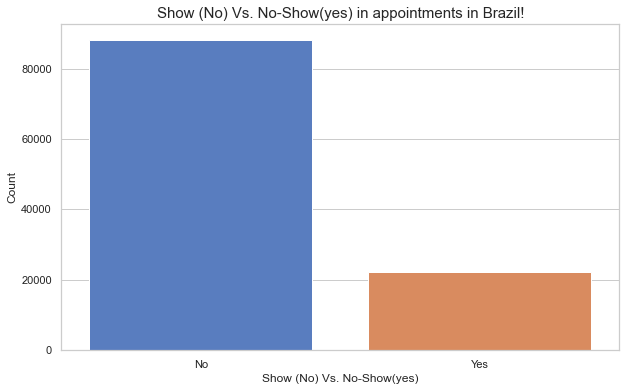

In [21]:
## Display show (No) & No-Show(yes) count
data_per =df1_clean['No_show'].value_counts(ascending=False).to_frame()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=data_per.index, y='No_show', data=data_per, ci=None, palette="muted",orient='v', )
ax.set_title("Show (No) Vs. No-Show(yes) in appointments in Brazil!", fontsize=15)
ax.set_xlabel ("Show (No) Vs. No-Show(yes)")
ax.set_ylabel ("Count")



### What Neighbourhood has the highest Show ?
#### JARDIM CAMBURI Neighbourhood has the highest Show count with 30.9 % percentage

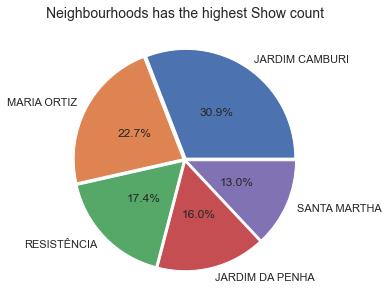

In [22]:
## Display Neighbourhood has the highest Show count
No_show = df1_clean.loc[df1_clean['No_show'] == 'No']
z = No_show.groupby(['Neighbourhood'])['No_show'].count().nlargest(5)


pie, ax = plt.subplots(figsize=[6,5])
labels = z.keys()
plt.pie(x=z, autopct="%.1f%%", explode=[0.02]*5, labels=labels, pctdistance=0.5)
plt.title("Neighbourhoods has the highest Show count", fontsize=14);


### In the highest Neighbourhood that has the highest Show ,What is the gender that has the highest Show?
#### Females has 4147 show highrer than males that has 2105 show

Text(0, 0.5, 'Gender')

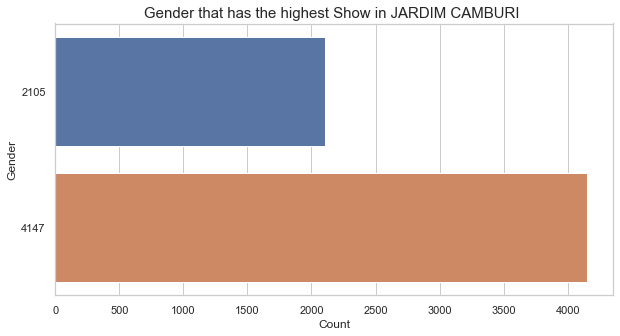

In [23]:
## Display the gender count of 
JARDIM_CAMBURI = No_show.loc[No_show['Neighbourhood'] == 'JARDIM CAMBURI']
z = JARDIM_CAMBURI.groupby(['Gender'])['No_show'].value_counts(ascending=False)

Neighbourhood = z.to_frame(name='Count')

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=Neighbourhood.index, y=Neighbourhood.Count, data=z,orient='h' )
ax.set_title("Gender that has the highest Show in JARDIM CAMBURI ", fontsize=15)
ax.set_xlabel ("Count")
ax.set_ylabel ("Gender")



<a id='conclusions'></a>
## Conclusions

### Limitations
#### There may be some possible limitations in this study.
* Reporting the area with states not Neighborhood will be more reliable for further good questions .
* The time of the study is only in the second quarter of 2016 , this definitely affect the sample time distribution and results.
* The age less than one year reported as zero , its better to reported by months which will help us to be related analysis for any less than one year patients researches in the future.

### No-show appointments in Brazil! Conclusion Discussion.
This dataset collects information from 100k medical appointments in Brazil!
* I downloaded the data set from the link.
* I imported data and libraries needed (pandas , numpy , matplotlib ,seaborn )
* After Visaual and programatic assessment I set the quality issues which I need to clean  and I Copied the dataset.    
* After Visual and programmatic assessment I set the quality issues which I need to clean and I Copied the dataset.
* We have 88207 attend the appointment and 22319 didn't attend.
* JARDIM CAMBURI Neighbourhood has the highest Show count with 30.9 % percentage
* Females are higher than males in show in JARDIM CAMBURI .
* at the end many thanks for reading my report.
 


In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1